In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [3]:
insurance_data = pd.read_csv("insurance.csv")
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
insurance_data.shape

(1338, 7)

In [6]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


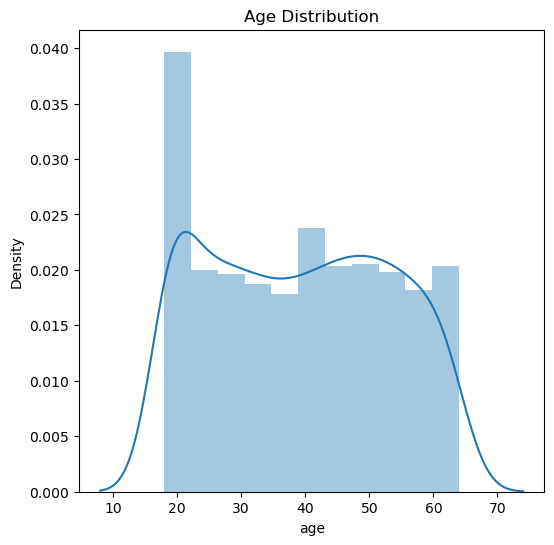

In [9]:
# yaş değerinin dağılımısns.set

plt.figure(figsize=(6,6))
sns.distplot(insurance_data['age'])
plt.title('Age Distribution')
plt.show()

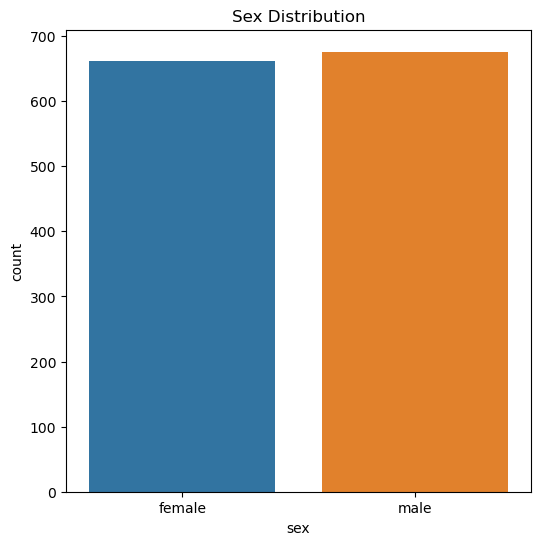

In [10]:
# Cinsiyet sütunu
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_data)
plt.title('Sex Distribution')
plt.show()

In [11]:
insurance_data['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

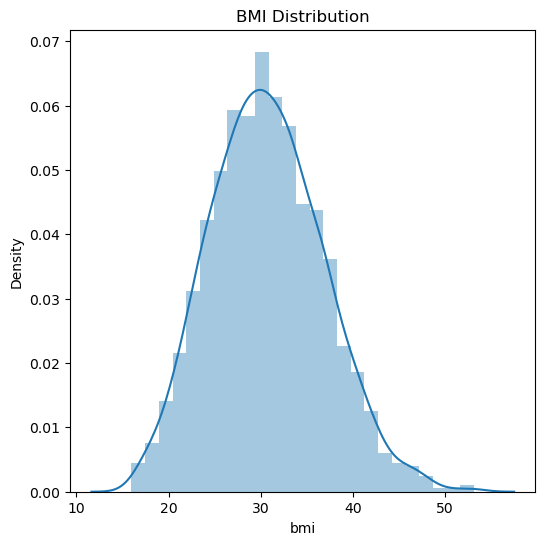

In [12]:
# bmi dağılımı
plt.figure(figsize=(6,6))
sns.distplot(insurance_data['bmi'])
plt.title('BMI Distribution')
plt.show()

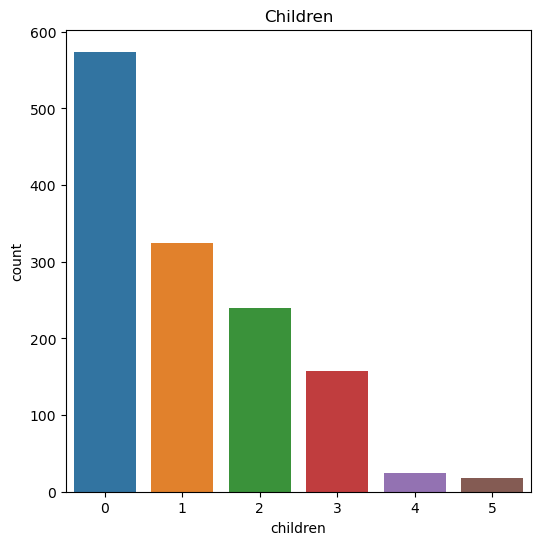

In [13]:
# çocuk sütunu
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_data)
plt.title('Children')
plt.show()

In [14]:
insurance_data['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

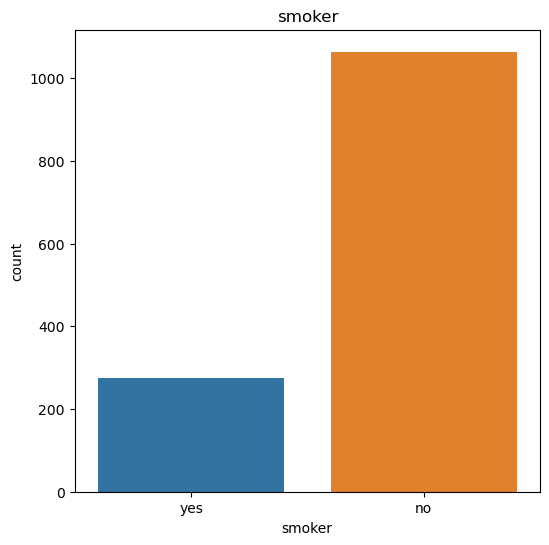

In [15]:
# sigara içen sütunu
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_data)
plt.title('smoker')
plt.show()

In [16]:
insurance_data['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

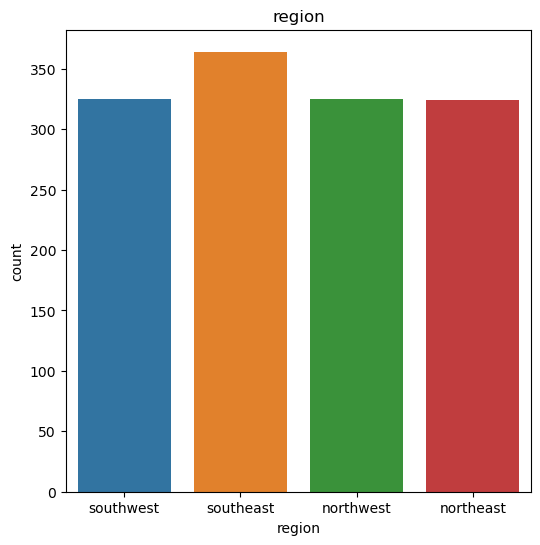

In [17]:
# bölge sütunu
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_data)
plt.title('region')
plt.show()

In [18]:
insurance_data['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

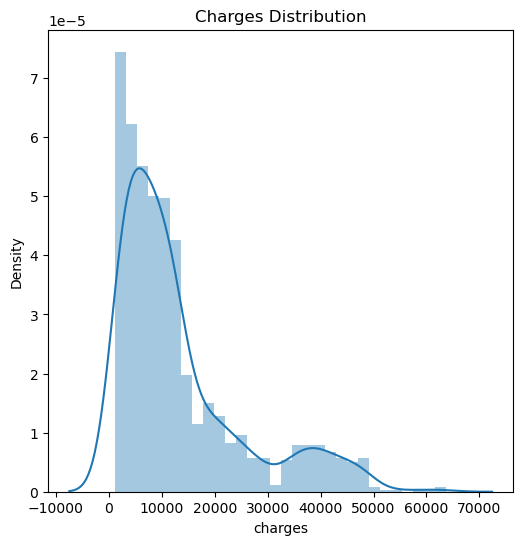

In [19]:
# masraf değerinin dağılımı
plt.figure(figsize=(6,6))
sns.distplot(insurance_data['charges'])
plt.title('Charges Distribution')
plt.show()

In [20]:
# encoding sex column
insurance_data.replace({'sex':{'male':0,'female':1}}, inplace=True)

3 # encoding 'smoker' column
insurance_data.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

# encoding 'region' column
insurance_data.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

In [21]:
X = insurance_data.drop(columns='charges', axis=1)
Y = insurance_data['charges']

In [22]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [23]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


In [25]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [26]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [27]:
# Poisson GLM
poisson_model = sm.GLM(Y_train, X_train, family=sm.families.Poisson()).fit()

# Eğitim verilerine ilişkin tahmin
training_data_prediction = poisson_model.predict(X_train)
# Eğitim verileri için R kare değeri
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared value (train): ', r2_train)

R squared value (train):  0.76051578849737


In [28]:
# Test verilerine ilişkin tahmin
test_data_prediction = poisson_model.predict(X_test)

In [29]:
# Test verileri için R kare değeri
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared value (test): ', r2_test)

R squared value (test):  0.7590319062132334


In [30]:
# Giriş verileri
input_data = (22, 0, 29.40 , 1, 1, 0)

input_data_as_numpy_array = np.asarray(input_data)
# Diziyi yeniden şekillendir
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

input_data_reshaped = sm.add_constant(input_data_reshaped, has_constant='add')

# Giriş verileri için tahmin
prediction = poisson_model.predict(input_data_reshaped)
print('Sigorta bedeli USD', prediction[0])

Sigorta bedeli USD 5391.886008594496
